In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 550 data with 300 features
print(x_train.shape)

(550, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5, rd_seed=42):
    """Split the data into k folds. The implementation would drop the remaining data.
    """
    
    # random shuffle the data
    num_data = len(x_train)
    idx = np.arange(num_data)
    np.random.seed(rd_seed)
    np.random.shuffle(idx)
    
    # split the data
    split_size = num_data // k
    kfold_data = [[
        np.append(idx[0:split_size*x], idx[split_size*(x+1):split_size*k]),
        idx[split_size*x:split_size*(x+1)]
    ] for x in range(k)]
    
    return kfold_data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 55 # The number of data in each validation fold should equal to training data divieded by K

## example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  6  7  8  9 10 12 13 15 16 17 19], Validation index: [ 5 11 14 18]
Split: 2, Training index: [ 0  1  2  3  4  5  6  7 11 12 13 14 15 16 18 19], Validation index: [ 8  9 10 17]
Split: 3, Training index: [ 0  1  2  3  5  6  8  9 10 11 14 15 16 17 18 19], Validation index: [ 4  7 12 13]
Split: 4, Training index: [ 2  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19], Validation index: [0 1 3 6]
Split: 5, Training index: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 17 18], Validation index: [ 2 15 16 19]


In [8]:
kfold_data = cross_validation(np.arange(20), np.arange(20), k=5)
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C”, “kernel” and “gamma” to find the best parameters by cross-validation.

In [9]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [10]:
## your code
C_list = [0.01 * 10 ** i for i in range(7)]
gamma_list = [0.0001 * 10 ** i for i in range(8)]
results = np.empty((len(C_list), len(gamma_list)), dtype=float)

kfold_data = cross_validation(x_train, y_train, k=5)
for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        clf = SVC(C=C, kernel='rbf', gamma=gamma)
        summ = 0
        for train_idx, val_idx in kfold_data:
            clf.fit(
                [x_train[idx] for idx in train_idx],
                [y_train[idx] for idx in train_idx])
            y_pred = clf.predict([x_train[idx] for idx in val_idx])
            summ += accuracy_score(
                [y_train[idx] for idx in val_idx],
                y_pred)
        results[i][j] = summ / len(kfold_data)
        print(f'C = {C}, gamma = {gamma}, result = {results[i][j]}')

C = 0.01, gamma = 0.0001, result = 0.6890909090909091
C = 0.01, gamma = 0.001, result = 0.6890909090909091
C = 0.01, gamma = 0.01, result = 0.6890909090909091
C = 0.01, gamma = 0.1, result = 0.6890909090909091
C = 0.01, gamma = 1.0, result = 0.6890909090909091
C = 0.01, gamma = 10.0, result = 0.6890909090909091
C = 0.01, gamma = 100.0, result = 0.6890909090909091
C = 0.01, gamma = 1000.0, result = 0.6890909090909091
C = 0.1, gamma = 0.0001, result = 0.6890909090909091
C = 0.1, gamma = 0.001, result = 0.6890909090909091
C = 0.1, gamma = 0.01, result = 0.6890909090909091
C = 0.1, gamma = 0.1, result = 0.6890909090909091
C = 0.1, gamma = 1.0, result = 0.6890909090909091
C = 0.1, gamma = 10.0, result = 0.6890909090909091
C = 0.1, gamma = 100.0, result = 0.6890909090909091
C = 0.1, gamma = 1000.0, result = 0.6890909090909091
C = 1.0, gamma = 0.0001, result = 0.6890909090909091
C = 1.0, gamma = 0.001, result = 0.6890909090909091
C = 1.0, gamma = 0.01, result = 0.6890909090909091
C = 1.0, gam

In [11]:
max_idx = np.argmax(results)
i, j = np.unravel_index(max_idx, results.shape)
print(results[i][j])
best_parameters = C_list[i], gamma_list[j]

0.9054545454545455


In [12]:
print(best_parameters)

(10.0, 0.001)


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def heatmap(result, C_list, gamma_list):
    x = C_list
    y = gamma_list
    df = pd.DataFrame(result, columns = y, index = x)
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.heatmap(df, cmap='RdPu', annot=True, robust=True, ax=ax, fmt='.2%')
    #ax.xaxis.set_ticks_position('top')

    ax.set_title('Hyperparameter Gridsearch', fontsize=25)
    ax.set_xlabel('Gamma Parameter', fontsize=18)
    ax.set_ylabel('C Parameter', fontsize=18)
    plt.tight_layout()
    return fig

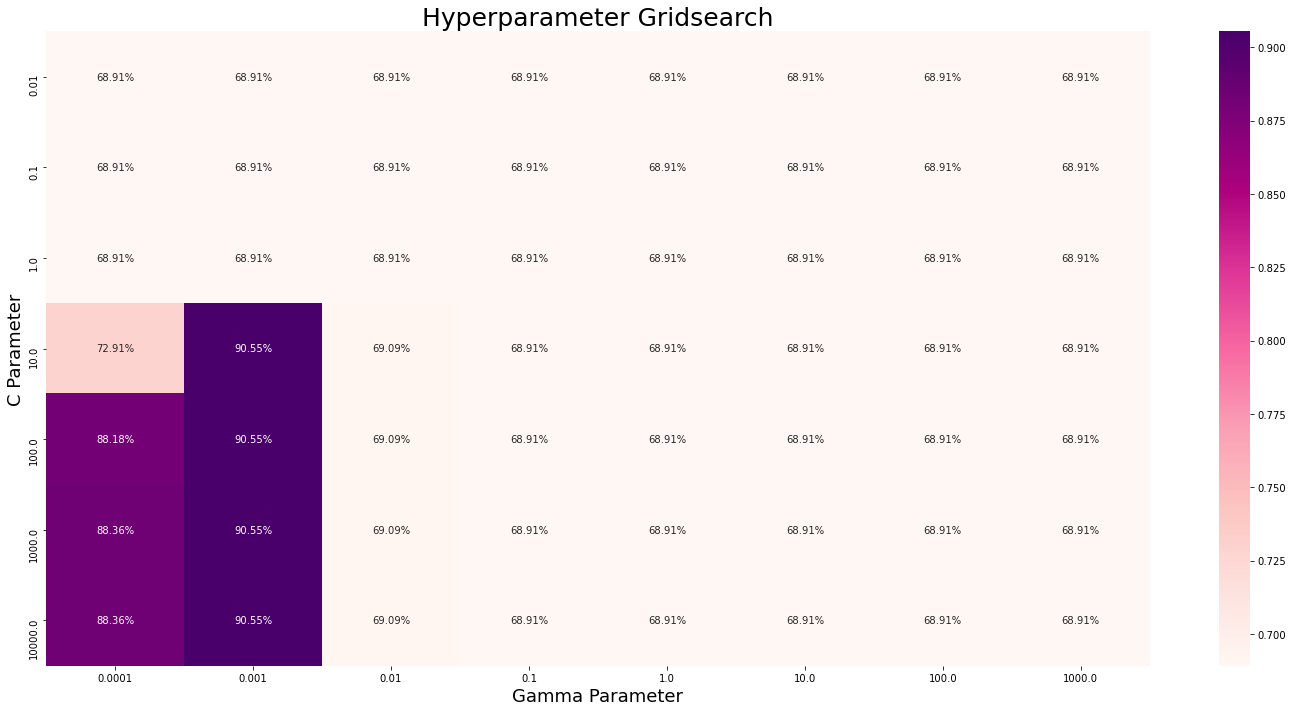

In [15]:
fig = heatmap(results, C_list, gamma_list)

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set. **You accuracy should over 0.85**

In [16]:
best_model = SVC(C=best_parameters[0], kernel='rbf', gamma=best_parameters[1])
best_model.fit(x_train, y_train)

SVC(C=10.0, gamma=0.001)

In [17]:
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

Accuracy score:  0.8958333333333334


## Question 5
Compare the performance of the model you have implemented in HW1 with the SVM

### HW1

In [18]:
train_df = pd.read_csv("../HW1/train_data.csv")
x_train = train_df['x_train'].to_numpy().reshape(-1,1)
y_train = train_df['y_train'].to_numpy().reshape(-1,1)

test_df = pd.read_csv("../HW1/test_data.csv")
x_test = test_df['x_test'].to_numpy().reshape(-1,1)
y_test = test_df['y_test'].to_numpy().reshape(-1,1)

In [19]:
from tqdm import tqdm
import math

In [20]:
def MAELoss(target, predict):
    return np.sum(np.abs(target - predict)) / len(predict)

def MSELoss(target, predict):
    return np.sum(np.power(target - predict, 2)) / len(predict)

In [21]:
class RegDataset:
    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file)
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        data = np.array(self.df.iloc[idx, 0])
        target = np.array(self.df.iloc[idx, 1])
        sample = {'data': data, 'target': target}
        return sample

class RegModel:
    def __init__(self):
        self.weight = np.random.normal(0, 1)
        self.bias = np.random.normal(0, 1)
        self.history = {'weight': [], 'bias': [], 'loss': []}

    def train(self, dataset, lr=0.05, epoch=100, batch_size=32, drop_last=True, criterion='MSE'):
        # Update history
        self.history['weight'].append(self.weight)
        self.history['bias'].append(self.bias)
        if criterion == 'MSE':
            self.history['loss'].append(MSELoss(dataset[:]['target'], self.predict(dataset[:]['data'])))
        elif criterion == 'MAE':
            self.history['loss'].append(MAELoss(dataset[:]['target'], self.predict(dataset[:]['data'])))

        for i in tqdm(range(epoch)):
            # Shuffle and split the dataset before each epoch
            indices = np.arange(len(dataset))
            np.random.shuffle(indices)
            batches_indices = np.array_split(indices, math.ceil(len(dataset) // batch_size))
            if drop_last:
                batches_indices = [x for x in batches_indices if 0 < x.size <= batch_size]
            # Train for each batch
            for batch_indices in batches_indices:
                self._train(dataset, batch_indices, lr, criterion)
            # Update history
            self.history['weight'].append(self.weight)
            self.history['bias'].append(self.bias)
            if criterion == 'MSE':
                self.history['loss'].append(MSELoss(dataset[:]['target'], self.predict(dataset[:]['data'])))
            elif criterion == 'MAE':
                self.history['loss'].append(MAELoss(dataset[:]['target'], self.predict(dataset[:]['data'])))

    def _train(self, dataset, indices, lr, criterion):
        data = dataset[indices]['data']
        target = dataset[indices]['target']
        predicts = self.bias + self.weight * data
        # Initialize the gradient
        w_grad = 0
        b_grad = 0
        # Gradient descent
        if criterion == 'MSE':
            w_grad += np.sum(2 * (target - predicts) * (-data)) / len(predicts)
            b_grad += np.sum(2 * (target - predicts) * (-1)) / len(predicts)
        elif criterion == 'MAE':
            indicators = np.sign(target - predicts)
            w_grad += np.sum(-indicators * data) / len(predicts)
            b_grad += np.sum(-indicators) / len(predicts)
        # Update parameters
        self.weight -= lr * w_grad
        self.bias -= lr * b_grad

    def predict(self, data):
        output = self.bias + self.weight * data
        return output

In [22]:
dataset = {'train': RegDataset('../HW1/train_data.csv'), 'test': RegDataset('../HW1/test_data.csv')}

In [23]:
regmodel_mse = RegModel()
regmodel_mse.train(dataset['train'], batch_size=len(dataset['train']), criterion='MSE')

100%|██████████| 100/100 [00:00<00:00, 273.22it/s]


In [24]:
y_pred = regmodel_mse.predict(dataset['test'][:]['data'])

In [25]:
error_LR = MSELoss(dataset['test'][:]['target'], y_pred)

### SVM

In [26]:
y_train = y_train.reshape((y_train.shape[0],))
y_test = y_test.reshape((y_test.shape[0],))

In [27]:
## your code
C_list = [0.01 * 10 ** i for i in range(7)]
gamma_list = [0.0001 * 10 ** i for i in range(8)]
results = np.empty((len(C_list), len(gamma_list)), dtype=float)

kfold_data = cross_validation(x_train, y_train, k=5)
for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        reg = SVR(C=C, kernel='rbf', gamma=gamma, degree=1)
        summ = 0
        for train_idx, val_idx in kfold_data:
            reg.fit(
                [x_train[idx] for idx in train_idx],
                [y_train[idx] for idx in train_idx])
            summ += reg.score(
                [x_train[idx] for idx in val_idx],
                [y_train[idx] for idx in val_idx])
        results[i][j] = summ / len(kfold_data)
        print(f'C = {C}, gamma = {gamma}, result = {results[i][j]}')

C = 0.01, gamma = 0.0001, result = -0.0019150581082531648
C = 0.01, gamma = 0.001, result = 0.0053903495939565
C = 0.01, gamma = 0.01, result = 0.06260806201134232
C = 0.01, gamma = 0.1, result = 0.2021032441319722
C = 0.01, gamma = 1.0, result = 0.1993998607727739
C = 0.01, gamma = 10.0, result = 0.14092571373494683
C = 0.01, gamma = 100.0, result = 0.06813842009540197
C = 0.01, gamma = 1000.0, result = 0.0259480271736199
C = 0.1, gamma = 0.0001, result = 0.005432369767141431
C = 0.1, gamma = 0.001, result = 0.06541123436567112
C = 0.1, gamma = 0.01, result = 0.24141974845072411
C = 0.1, gamma = 0.1, result = 0.27518752434658533
C = 0.1, gamma = 1.0, result = 0.26600317699703646
C = 0.1, gamma = 10.0, result = 0.24006894097606307
C = 0.1, gamma = 100.0, result = 0.18627567644855125
C = 0.1, gamma = 1000.0, result = 0.12860041546385317
C = 1.0, gamma = 0.0001, result = 0.06574315639990254
C = 1.0, gamma = 0.001, result = 0.24463370358963532
C = 1.0, gamma = 0.01, result = 0.28473417100

In [28]:
max_idx = np.argmax(results)
i, j = np.unravel_index(max_idx, results.shape)
print(results[i][j])
best_parameters = C_list[i], gamma_list[j]

0.288572291846138


In [29]:
print(best_parameters)

(10000.0, 0.1)


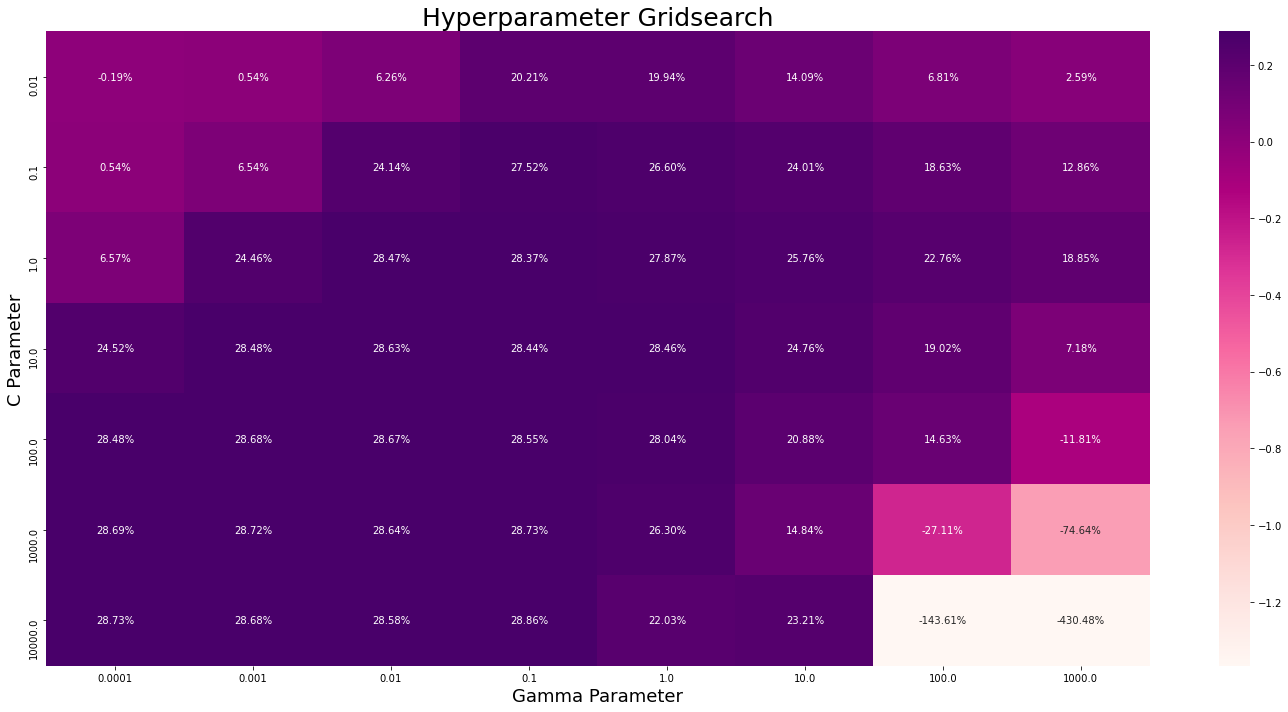

In [30]:
fig = heatmap(results, C_list, gamma_list)

In [31]:
best_model = SVR(kernel='rbf', C=best_parameters[0], gamma=best_parameters[1], degree=1)
best_model.fit(x_train, y_train)

SVR(C=10000.0, degree=1, gamma=0.1)

In [32]:
error_SVM = (np.square(best_model.predict(x_test) - y_test)).mean()

In [34]:
print("Square error of Linear regression: ", error_LR)
print("Square error of SVM regresssion model: ", error_SVM)

Square error of Linear regression:  0.4909026595704948
Square error of SVM regresssion model:  0.49540673366698956
